<a href="https://colab.research.google.com/github/parikshithsivakumar/Machine-Learning/blob/main/MlLAb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

# Load dataset from the specific sheet
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='marketing_campaign')

# Extract features and labels
X = df.drop('Year_Birth', axis=1)
y = df['Year_Birth']


In [22]:
print(df.columns)



Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [23]:
import pandas as pd

# Load dataset
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='marketing_campaign')

# Display unique classes in the Response column
unique_classes = df['Response'].unique()
print("Unique classes in the 'Response' column:", unique_classes)


Unique classes in the 'Response' column: [1 0]


In [24]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='marketing_campaign')

# Extract features and labels
X = df.drop('Response', axis=1).select_dtypes(include=[np.number])  # Use only numerical features
y = df['Response']

def calculate_intraclass_interclass(X, y):
    classes = y.unique()
    class_means = {}
    class_spreads = {}

    for cls in classes:
        class_data = X[y == cls]
        class_means[cls] = class_data.mean(axis=0)
        class_spreads[cls] = class_data.std(axis=0)

    interclass_distances = {}
    for cls1 in classes:
        for cls2 in classes:
            if cls1 != cls2:
                distance = np.linalg.norm(class_means[cls1] - class_means[cls2])
                interclass_distances[(cls1, cls2)] = distance

    return class_means, class_spreads, interclass_distances

class_means, class_spreads, interclass_distances = calculate_intraclass_interclass(X, y)
print("Class Means:", class_means)
print("Class Spreads:", class_spreads)
print("Interclass Distances:", interclass_distances)


Class Means: {1: ID                      5421.820359
Year_Birth              1969.416168
Income                 60209.675676
Kidhome                    0.341317
Teenhome                   0.305389
Recency                   35.383234
MntWines                 502.703593
MntFruits                 38.203593
MntMeatProducts          294.353293
MntFishProducts           52.050898
MntSweetProducts          38.634731
MntGoldProds              61.446108
NumDealsPurchases          2.335329
NumWebPurchases            5.071856
NumCatalogPurchases        4.203593
NumStorePurchases          6.095808
NumWebVisitsMonth          5.293413
AcceptedCmp3               0.230539
AcceptedCmp4               0.185629
AcceptedCmp5               0.275449
AcceptedCmp1               0.236527
AcceptedCmp2               0.059880
Complain                   0.008982
Z_CostContact              3.000000
Z_Revenue                 11.000000
dtype: float64, 0: ID                      5622.009444
Year_Birth              1968

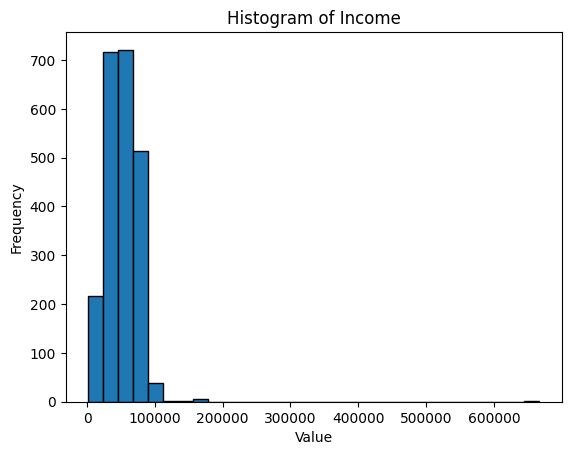

Mean of Income: 52247.25135379061
Variance of Income: 633397830.1872725


In [33]:
import matplotlib.pyplot as plt

feature = 'Income'  # Change this to any feature you want to analyze
data = X[feature]

# Plot histogram
plt.hist(data, bins=30, edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean = np.mean(data)
variance = np.var(data)
print(f"Mean of {feature}: {mean}")
print(f"Variance of {feature}: {variance}")


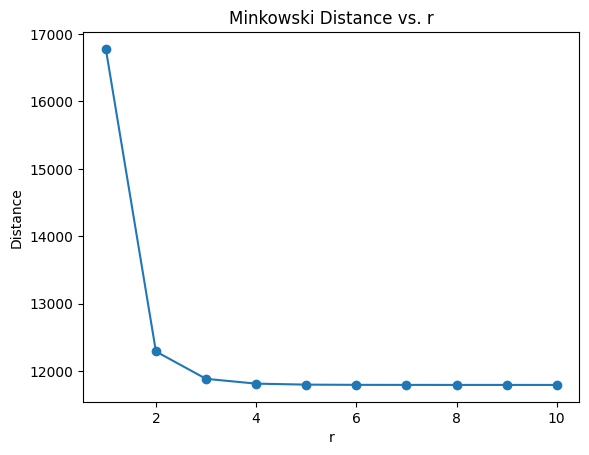

In [34]:
def minkowski_distance(x1, x2, r):
    return np.linalg.norm(x1 - x2, ord=r)

feature_vector_1 = X.iloc[0].values
feature_vector_2 = X.iloc[1].values
r_values = range(1, 11)
distances = [minkowski_distance(feature_vector_1, feature_vector_2, r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='marketing_campaign')

# Extract features and labels
X = df.drop('Response', axis=1).select_dtypes(include=[np.number])  # Use only numerical features
y = df['Response']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y)






In [35]:
# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [36]:

# Test accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN (k=3): {accuracy:.2f}")

Accuracy of kNN (k=3): 0.82


In [37]:


# Predict using the kNN classifier
predictions = knn.predict(X_test)
print("Predictions on test set:", predictions)


Predictions on test set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [38]:

# Confusion matrix and performance metrics
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
cr = classification_report(y_test, predictions)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[542  30]
 [ 88  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       572
           1       0.29      0.12      0.17       100

    accuracy                           0.82       672
   macro avg       0.57      0.53      0.54       672
weighted avg       0.77      0.82      0.79       672



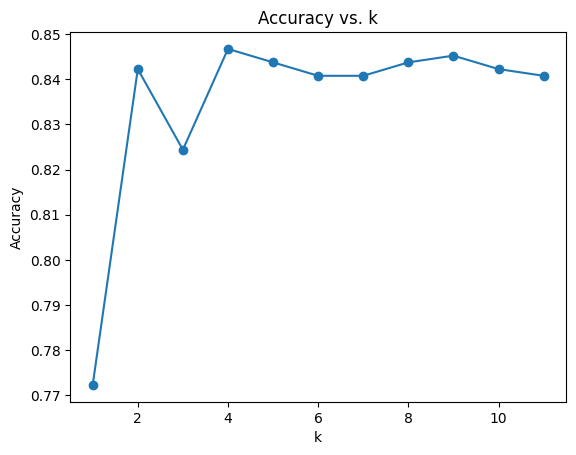

In [39]:
# Vary k from 1 to 11 and plot accuracy
k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()